In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [43]:
from google.colab import files
upload=files.upload()

Saving forestfires.csv to forestfires (1).csv


In [44]:
df=pd.read_csv("forestfires.csv")
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [45]:
df.shape

(517, 31)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [47]:
df.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [48]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
column_names = df.columns
for col in column_names:
 i=df[col].value_counts()
 print(i)
 print('##############################################################')

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64
##############################################################
sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64
##############################################################
92.1    28
91.6    28
91.0    22
91.7    19
92.4    16
        ..
86.9     1
85.2     1
53.4     1
85.1     1
94.4     1
Name: FFMC, Length: 106, dtype: int64
##############################################################
99.0     10
129.5     9
231.1     8
142.4     8
35.8      7
         ..
138.1     1
109.2     1
91.6      1
122.3     1
146.0     1
Name: DMC, Length: 215, dtype: int64
##############################################################
745.3    10
692.6     9
692.3     8
715.1     8
698.6     8
         ..
565.5     1
503.6     1
589.9     1
85.3      1
106.7     1
Name: DC, Length: 219, dtype: int64


In [50]:
# List continuous columns
continuous_columns = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col])]

In [51]:
# List categorical columns
categorical_columns = [col for col in df.columns if df[col].dtype == 'object' or pd.api.types.is_categorical_dtype(df[col])]

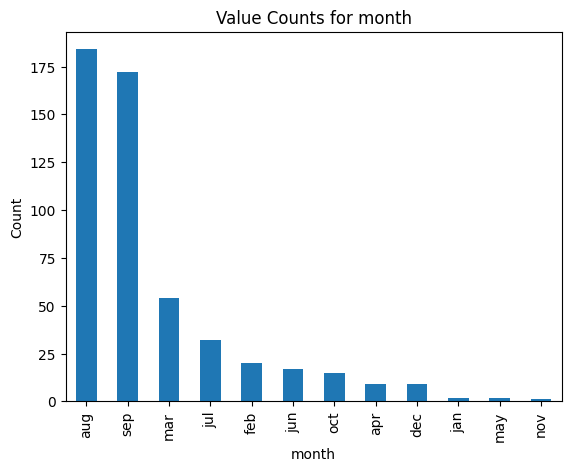

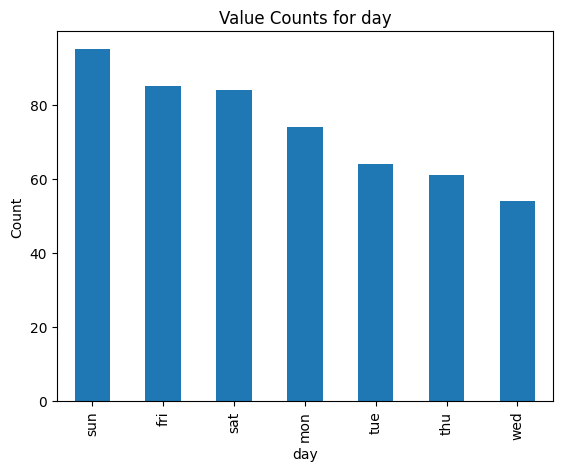

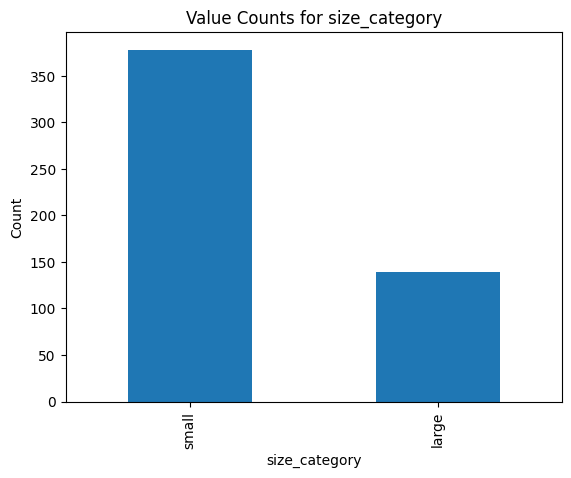

In [52]:
for col in categorical_columns:
    value_counts = df[col].value_counts()
    value_counts.plot(kind='bar')
    plt.title(f'Value Counts for {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

# Standardization of Data

In [53]:
X=df.drop(['size_category'], axis=1)
Y=df['size_category']

In [54]:
cont_cols = [col for col in X.columns if pd.api.types.is_numeric_dtype(X[col])]
cat_cols = [col for col in X.columns if X[col].dtype == 'object' or pd.api.types.is_categorical_dtype(X[col])]

In [55]:
print(cont_cols)
print(cat_cols)

['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep']
['month', 'day']


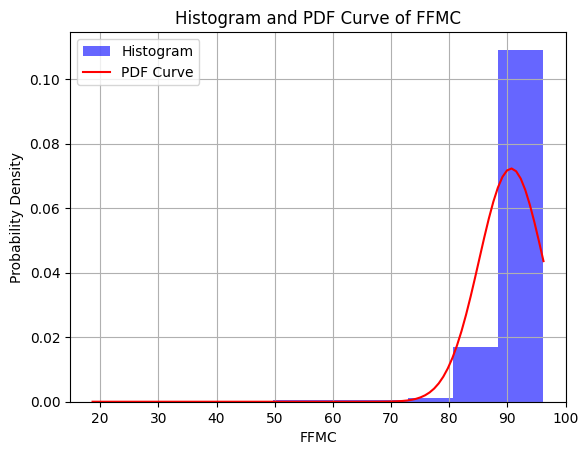

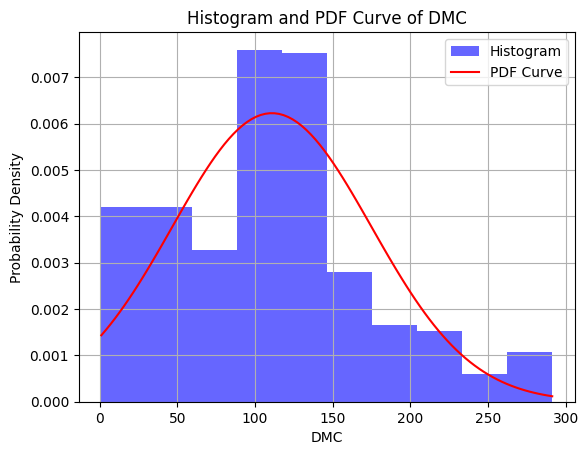

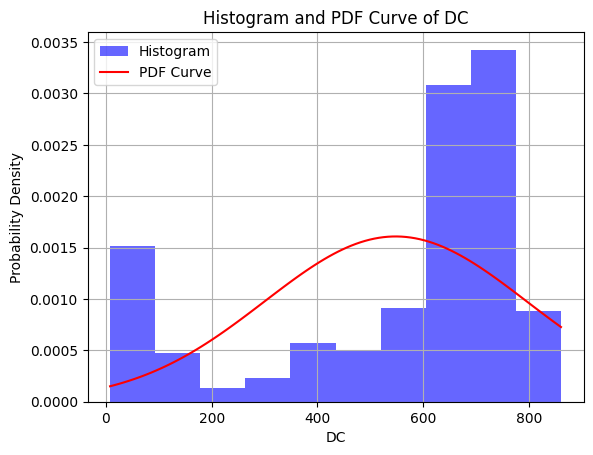

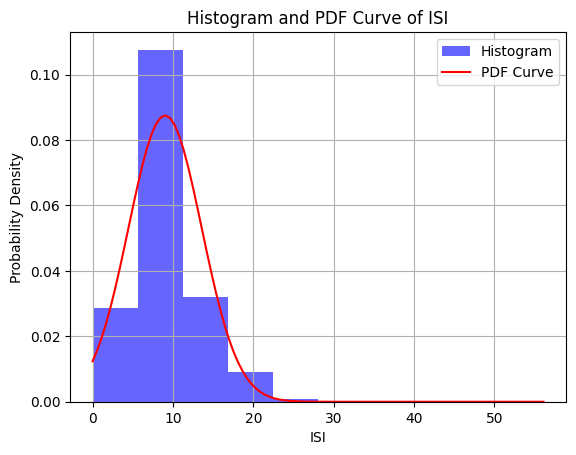

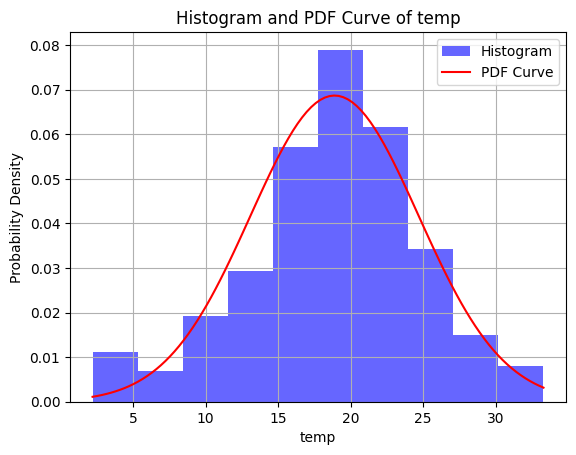

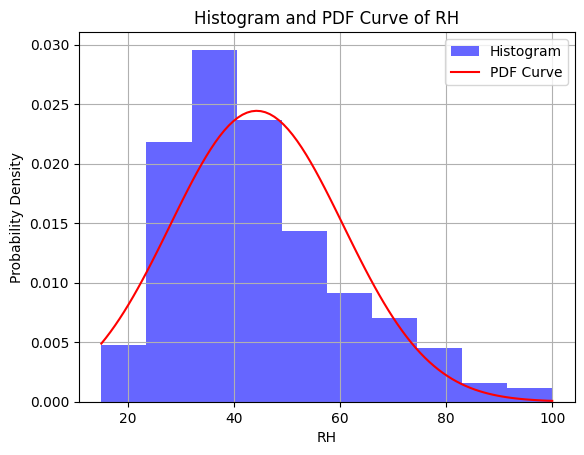

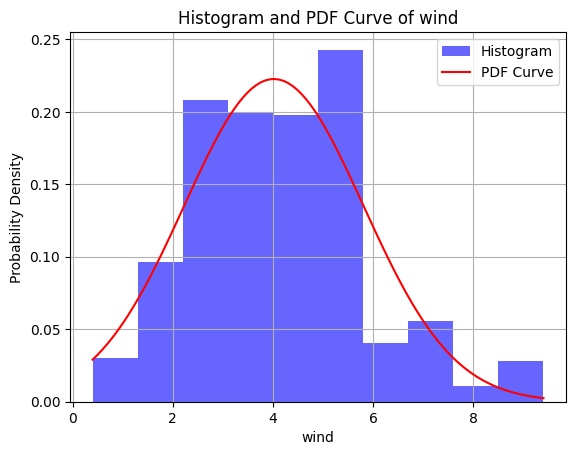

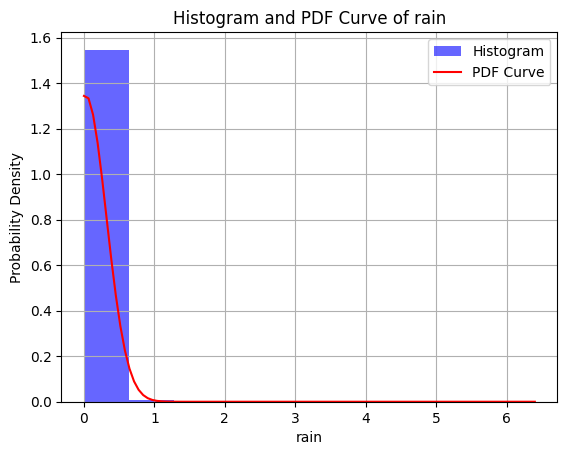

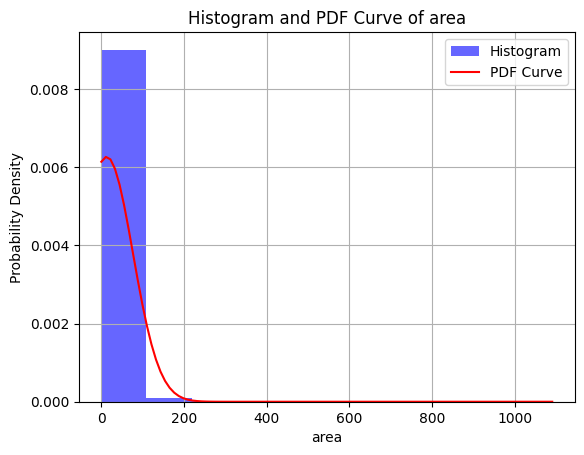

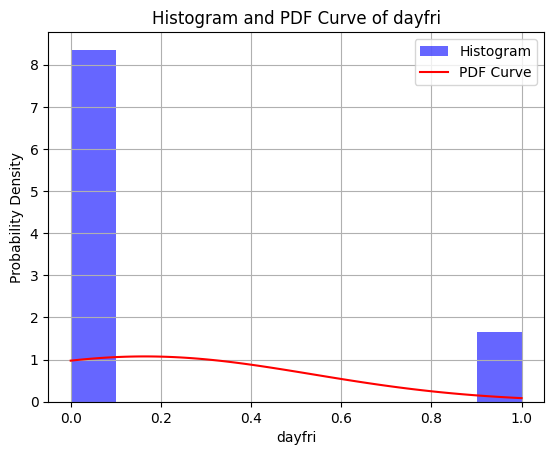

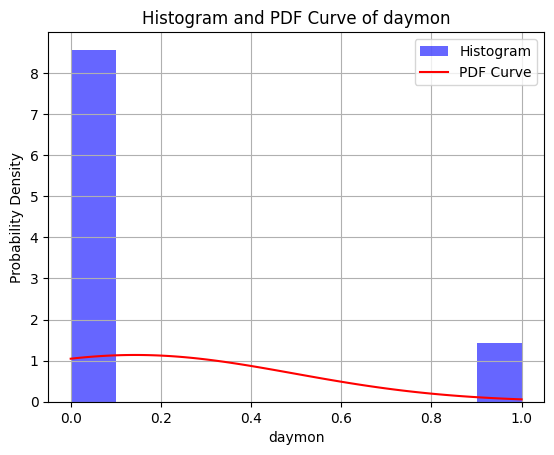

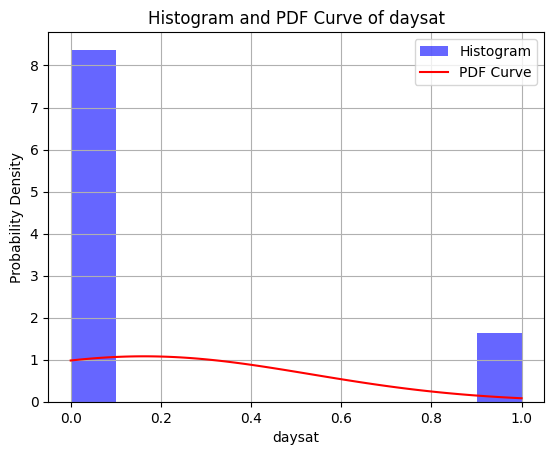

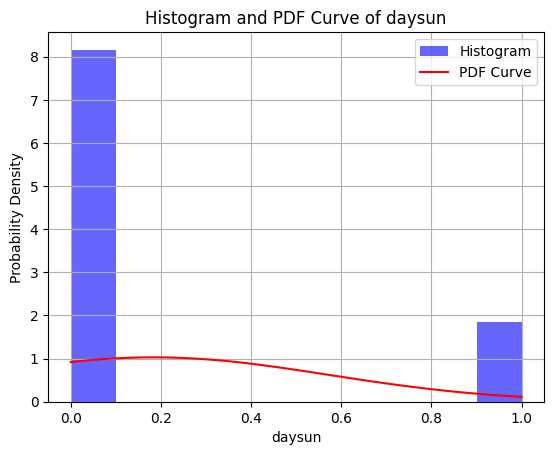

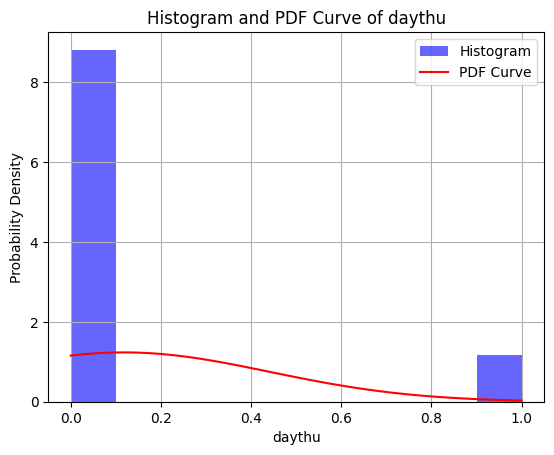

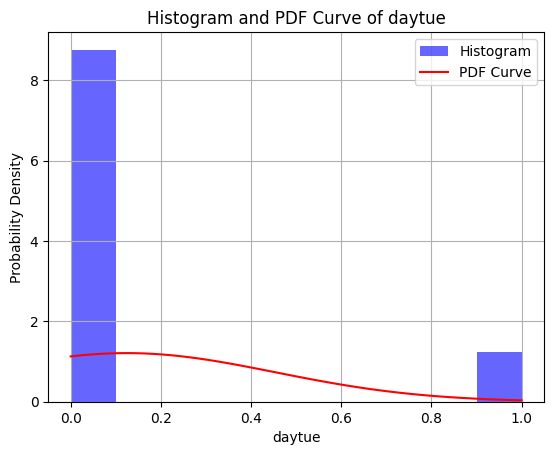

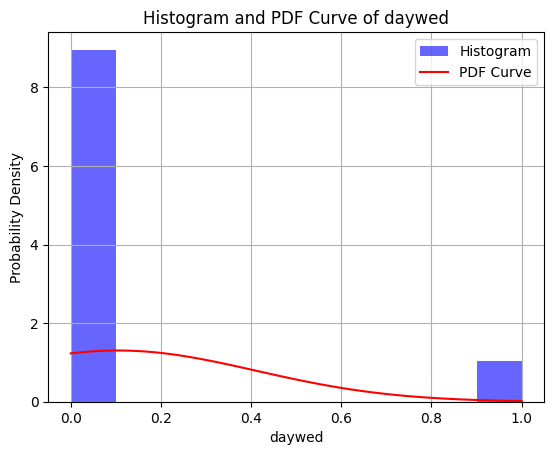

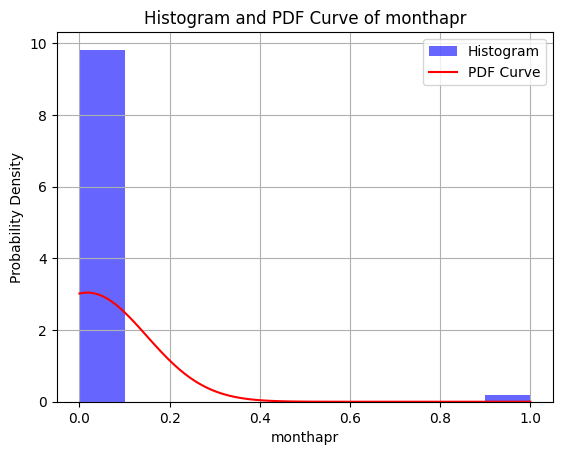

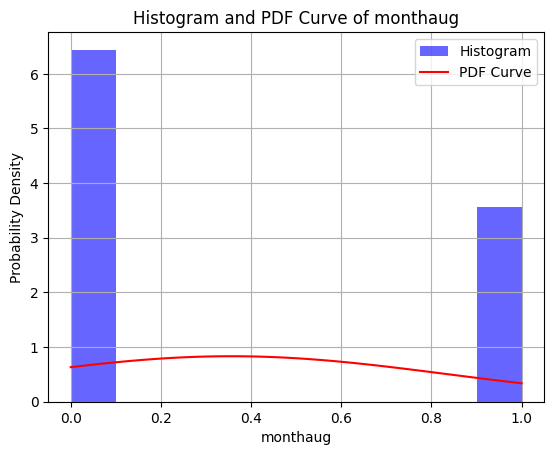

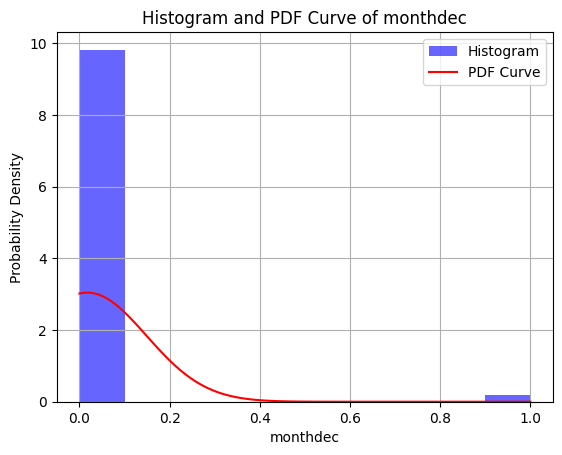

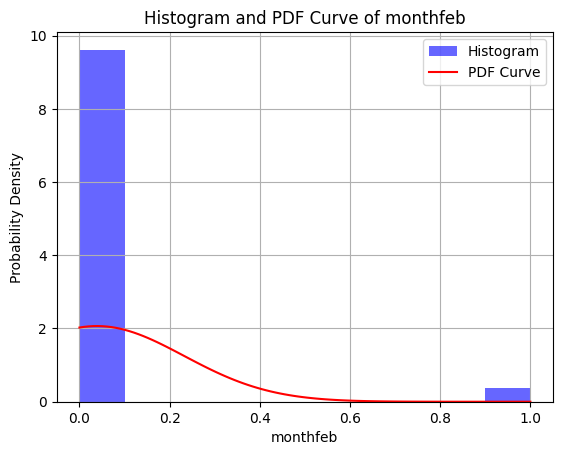

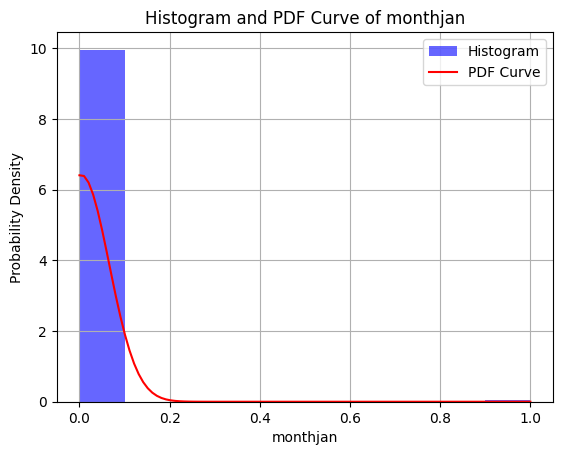

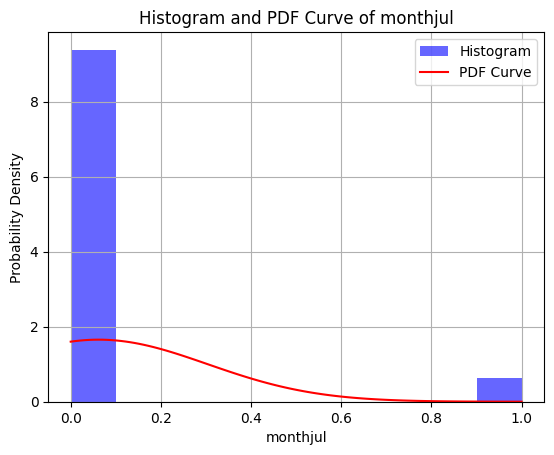

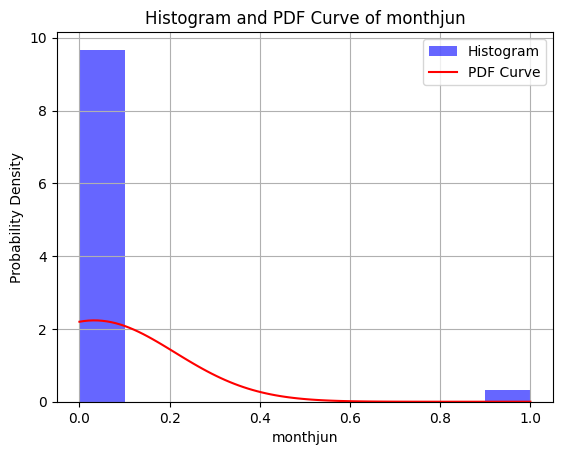

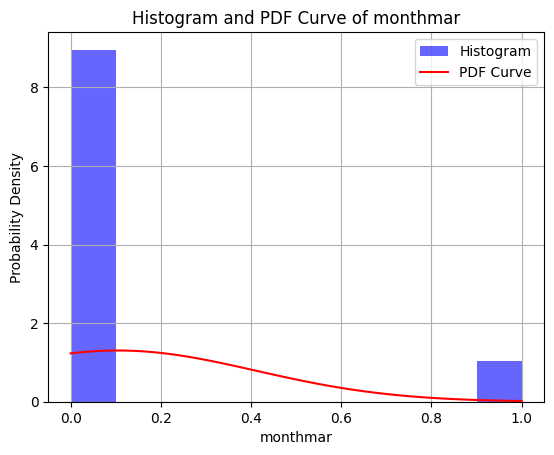

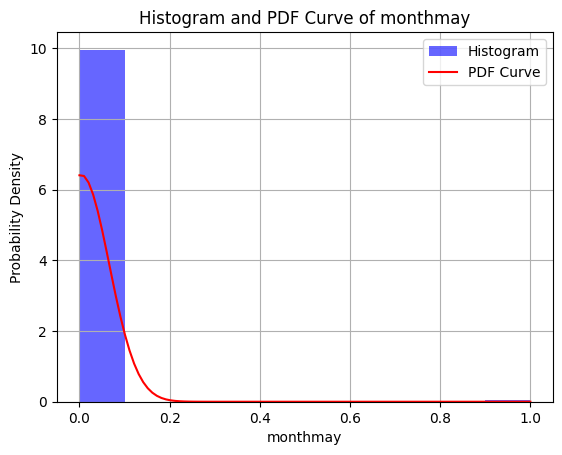

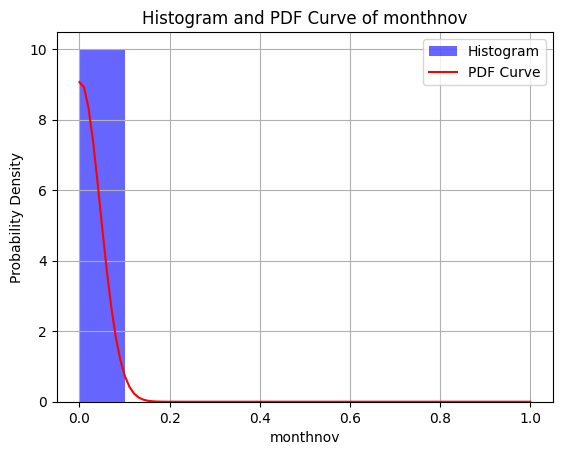

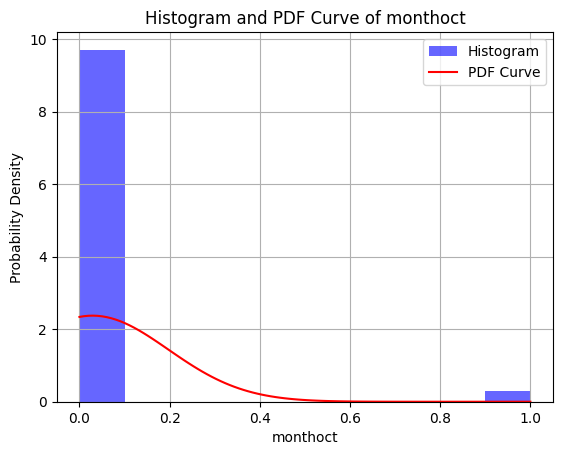

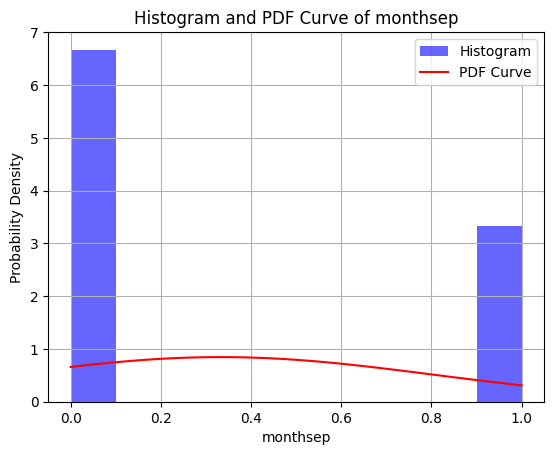

In [56]:
for col in cont_cols:
    X[col].hist(density=True, alpha=0.6, color='b', label='Histogram')

    # Compute the PDF curve
    mu, std = X[col].mean(), X[col].std()
    x = np.linspace(X[col].min(), X[col].max(), 100)
    pdf = (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / std) ** 2)

    # Plot the PDF curve
    plt.plot(x, pdf, 'r', label='PDF Curve')

    # Add labels and title
    plt.xlabel(col)
    plt.ylabel('Probability Density')
    plt.title(f'Histogram and PDF Curve of {col}')
    plt.legend()

    # Show the histogram with the curve
    plt.show()

In [57]:
X1=X[cont_cols]
X2=X[cat_cols]
# Standardize continuous columns in X
SS=StandardScaler()
X1 = SS.fit_transform(X1)
# Label encode categorical columns in X
LE= LabelEncoder()
for col in cat_cols:
    X2[col] = LE.fit_transform(X2[col])
X1=pd.DataFrame(X1)
X1.columns=cont_cols
X2=pd.DataFrame(X2)
X_new=pd.concat([X1,X2],axis=1)
X_new.head()
Y=pd.DataFrame(LE.fit_transform(Y))

<ipython-input-57-bdfd0f44ec85>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X2[col] = LE.fit_transform(X2[col])
<ipython-input-57-bdfd0f44ec85>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X2[col] = LE.fit_transform(X2[col])


In [58]:
X_new.drop(['month','day'],axis=1)
list(X_new)

['FFMC',
 'DMC',
 'DC',
 'ISI',
 'temp',
 'RH',
 'wind',
 'rain',
 'area',
 'dayfri',
 'daymon',
 'daysat',
 'daysun',
 'daythu',
 'daytue',
 'daywed',
 'monthapr',
 'monthaug',
 'monthdec',
 'monthfeb',
 'monthjan',
 'monthjul',
 'monthjun',
 'monthmar',
 'monthmay',
 'monthnov',
 'monthoct',
 'monthsep',
 'month',
 'day']

#Datasplitting

In [59]:
# step4:  Data Partition
X_train,X_test,Y_train,Y_test = train_test_split(X_new,Y,train_size=0.70,random_state=123)

In [60]:
#define keras model layer by layer
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64,input_dim=X_train.shape[1],activation='relu',kernel_initializer="uniform"),
    tf.keras.layers.Dense(32, activation="relu",kernel_initializer="uniform",),
    tf.keras.layers.Dense(16, activation="relu",kernel_initializer="uniform",),
    tf.keras.layers.Dense(8, activation="relu",kernel_initializer="uniform",),
    tf.keras.layers.Dense(4, activation="relu",kernel_initializer="uniform",),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [61]:
#compiling the model
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [62]:
#fitting the model
history=model.fit(X_train, Y_train, epochs=150, batch_size=10, validation_split=0.3)

Epoch 1/150
26/26 [==============================] - 2s 13ms/step - loss: 0.6889 - accuracy: 0.6984 - val_loss: 0.6802 - val_accuracy: 0.7890
Epoch 2/150
26/26 [==============================] - 0s 4ms/step - loss: 0.6713 - accuracy: 0.7103 - val_loss: 0.6271 - val_accuracy: 0.7890
Epoch 3/150
26/26 [==============================] - 0s 4ms/step - loss: 0.6186 - accuracy: 0.7103 - val_loss: 0.5407 - val_accuracy: 0.7890
Epoch 4/150
26/26 [==============================] - 0s 4ms/step - loss: 0.5910 - accuracy: 0.7103 - val_loss: 0.5291 - val_accuracy: 0.7890
Epoch 5/150
26/26 [==============================] - 0s 4ms/step - loss: 0.5777 - accuracy: 0.7103 - val_loss: 0.5155 - val_accuracy: 0.7890
Epoch 6/150
26/26 [==============================] - 0s 4ms/step - loss: 0.5580 - accuracy: 0.7103 - val_loss: 0.5019 - val_accuracy: 0.7890
Epoch 7/150
26/26 [==============================] - 0s 4ms/step - loss: 0.5424 - accuracy: 0.7103 - val_loss: 0.4915 - val_accuracy: 0.7890
Epoch 8/150


In [63]:
_, accuracy = model.evaluate(X_train, Y_train)
print("Train accuracy:  %.2f" % (accuracy*100))

12/12 [==============================] - 0s 2ms/step - loss: 0.1174 - accuracy: 0.9834
Train accuracy:  98.34


In [64]:
_, accuracy = model.evaluate(X_test, Y_test)
print("Test accuracy:  %.2f" % (accuracy*100))

5/5 [==============================] - 0s 3ms/step - loss: 1.3693 - accuracy: 0.8846
Test accuracy:  88.46


In [65]:
train_loss,_ = model.evaluate(X_train, Y_train)
test_loss,_ = model.evaluate(X_test, Y_test)

print('Training loss:', train_loss)
print('Test loss:', test_loss)


5/5 [==============================] - 0s 3ms/step - loss: 1.3693 - accuracy: 0.8846
Training loss: 0.11740124970674515
Test loss: 1.3693259954452515


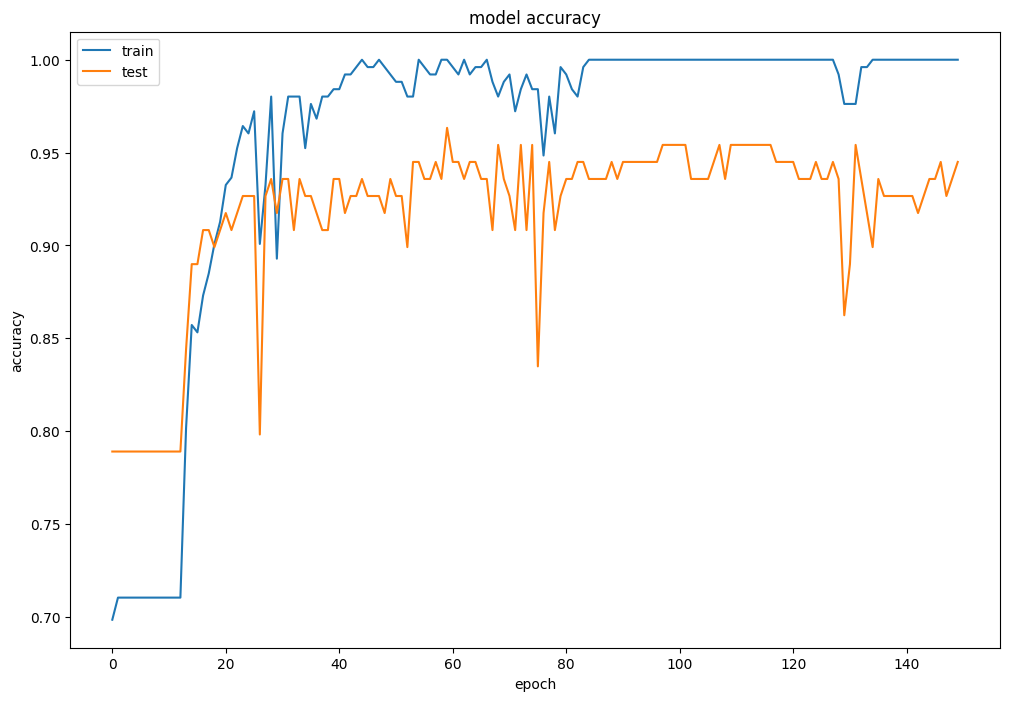

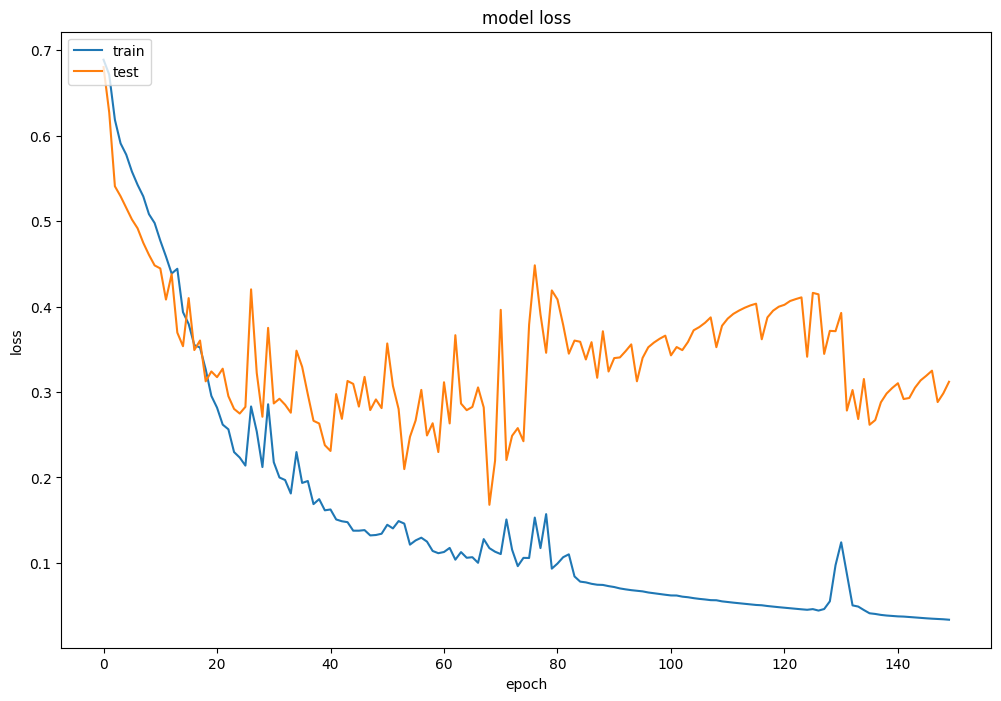

In [66]:
# summarize history for accuracy
plt.figure(figsize=(12,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Overall the model performance is very good.